# Comparing bars

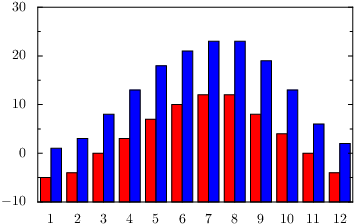

In [1]:
from pyx import *

g = graph.graphxy(width=8, x=graph.axis.nestedbar())
g.plot([graph.data.file("minimal.dat", xname="$0, 0", y=2),
        graph.data.file("minimal.dat", xname="$0, 1", y=3)],
       [graph.style.bar()])
g

To draw bars side by side to show differences for the same value you basically
need to replace the bar axis by a nestedbar axis and adjust the data to that
nesting.  The latter is done by providing a tuple of two values to the
nested bar axis instead of a single value. The first element of the tuple is
used to select a subaxis (in the present case: one out of twelve) of the
nestedbar axis. The second element of the tuple then selects a sub-axis of
that particular bar axis (here: one out of two).

<img src="http://pyx.sourceforge.net/bend.png" align="left"> You can replace `0` and `1` in the values provided to the xname parameter of
the data by other unique hashable objects. Note, however, that this does not
affect the  order of the bars of the subaxis. Instead, the order is defined by
the order that data is added to the bar axis. Consequently, when you swap `0`
and `1` in the xname parameter nothing will change in the output. However, this
value becomes relevant if you turn on naming of the sub-axis by using

    graph.axis.bar(defaultsubaxis=graph.axis.bar(dist=0))

instead of the `graph.axis.nestedbar` instance in the graph constructor.

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> You can also use the same values (i.e. objects with the same hash value) for
the subselection of the nested bar axis. Then the bars will overpaint each
other and by proper ordering of the data you can fake stacked bars by that. For
an description of how to do this properly, we refer to the [stacked.html Stack
bars on top of each other].

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> Let's suppose you change the values provided to the xname parameter of the
data from `"$1, 0"` and `"$1, 1"` to `"0, $1"` and `"1, $1"`, respectively. The
answer is, that all red bars will be shown on one subaxis and all blue bars
will be shown on another subaxis.

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> A nested bar axis is totally equivalent to a regular bar axis except for its
default value for the `defaultsubaxis` parameter in the constructor. While this
`defaultsubaxis` parameter is a special instance of a linear axis for the bar
axis, for a nestedbar axis its a special instance of another bar axis. The
nesting of bar axes is not limited to a single level: You can nest bar axes
into each other to any level you want. Providing explicit subaxes for certain
values, the nesting levels can even vary for the differen subaxes. (This is
totally crazy.)

<img src="http://pyx.sourceforge.net/bend.png" align="left"> In PyX versions prior to PyX 0.9 the creation of nested data for the bar axes
was hidden inside the graph styles (with the limitation as we use it here in
this example: adding precisely a single nesting level when passing multiple
data to a single set of styles). In previous versions we didn't had the
possibility to simply generate tuples for data columns. The automatism was
removed completely, which makes *all* the bended sections above possible.
This is a quite incompatible but absolutely necessary change.
